# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy.integrate import odeint

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

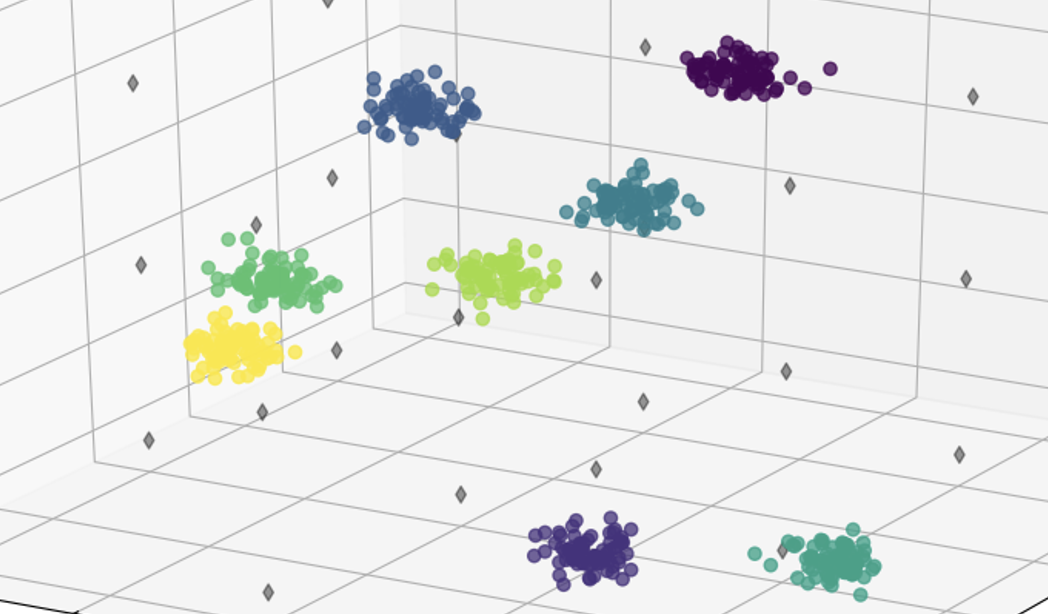

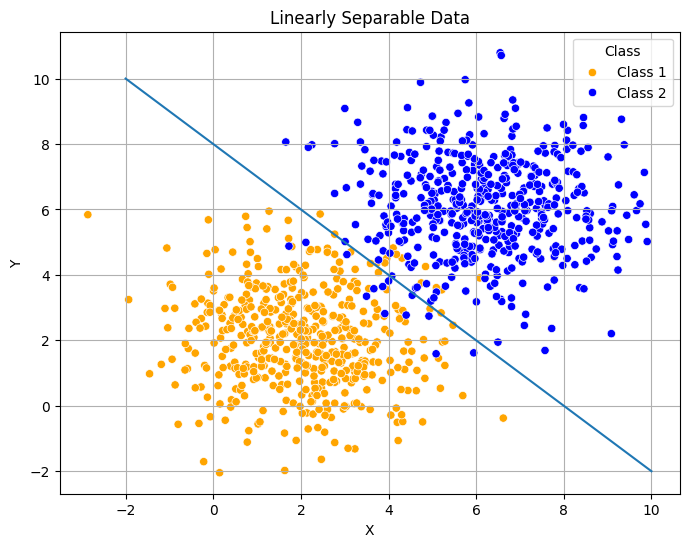

In [124]:
np.random.seed(42) 
class_1_x = np.random.normal(loc=2, scale=1.5, size=500)
class_1_y = np.random.normal(loc=2, scale=1.5, size=500)
class_1_labels = np.ones(500)

class_2_x = np.random.normal(loc=6, scale=1.5, size=500)
class_2_y = np.random.normal(loc=6, scale=1.5, size=500)
class_2_labels = np.zeros(500)

data = pd.DataFrame({
    'x': np.concatenate([class_1_x, class_2_x]),
    'y': np.concatenate([class_1_y, class_2_y]),
    'class': np.concatenate([class_1_labels, class_2_labels])
})

data.to_csv('linear_separable_dataset.csv', index=False)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='class', data=data, palette=['blue', 'orange'], style='class', markers=['o', 'o'])
plt.plot([-2, 10], [10, -2])  

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data')
plt.legend(title='Class', labels=['Class 1', 'Class 2'])
plt.grid(True)
plt.show()


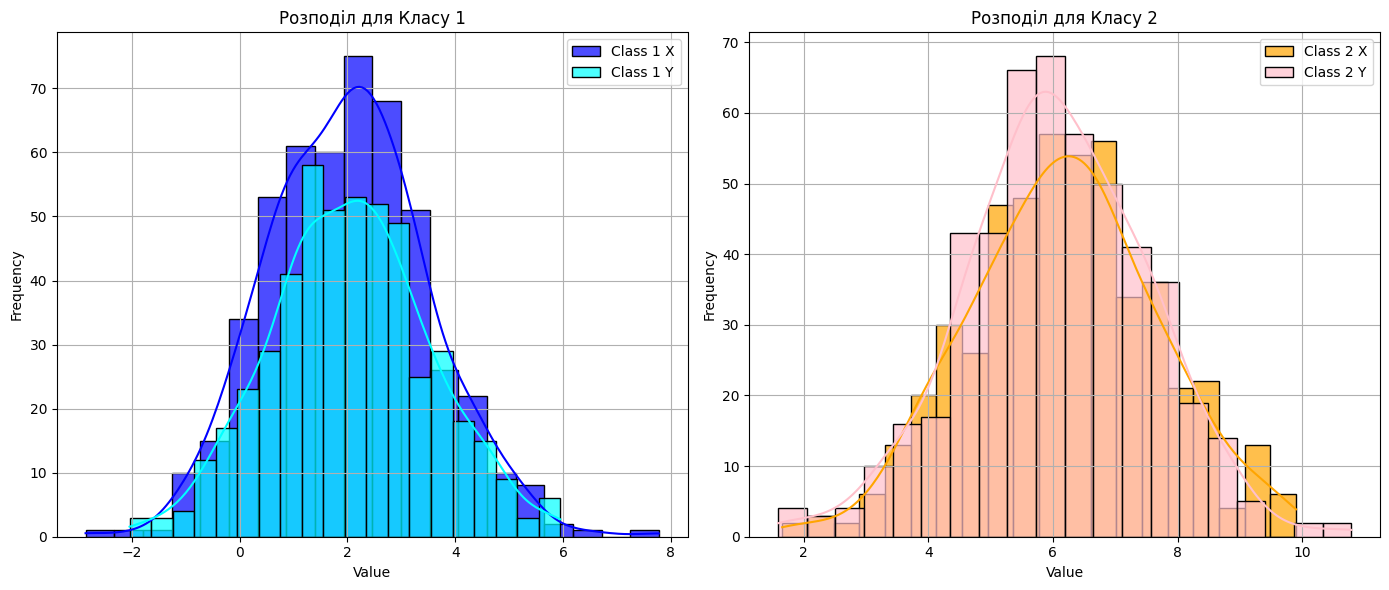

In [125]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(class_1_x, bins=20, color='blue', kde=True, label='Class 1 X', alpha=0.7)
sns.histplot(class_1_y, bins=20, color='cyan', kde=True, label='Class 1 Y', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Розподіл для Класу 1')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(class_2_x, bins=20, color='orange', kde=True, label='Class 2 X', alpha=0.7)
sns.histplot(class_2_y, bins=20, color='pink', kde=True, label='Class 2 Y', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Розподіл для Класу 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Висновок: Код генерує синтетичний набір даних з трьома класами, кожен з яких має 300 точок. Дані для кожного класу генеруються з нормального розподілу навколо різних середніх, створюючи перекриваючіся кластери. Набір даних візуалізується на діаграмі, де різні кольори представляють кожен клас. Діаграма показує, що класи мають деяке перекриття, що робить набір даних підходящим для класифікації.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

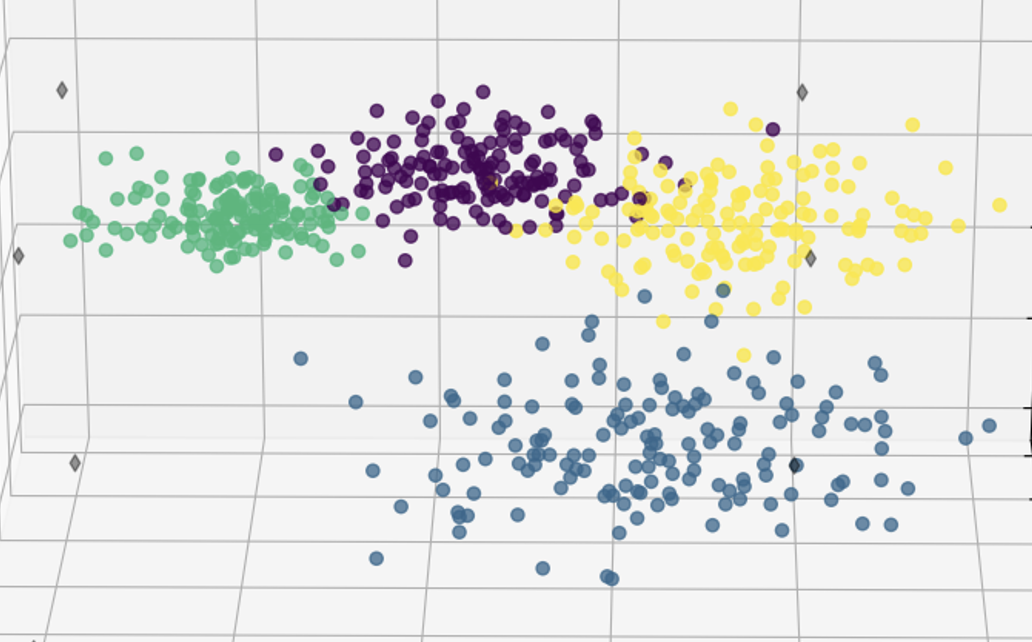

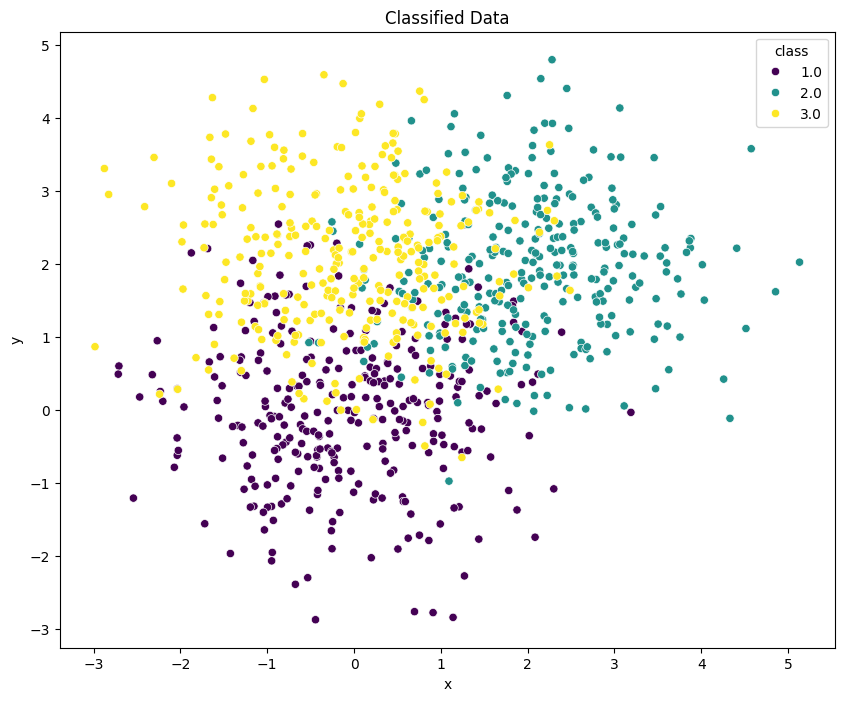

In [126]:
np.random.seed(0)

n_points = 300

class1 = np.random.randn(n_points, 2) + np.array([0, 0])
class2 = np.random.randn(n_points, 2) + np.array([2, 2])
class3 = np.random.randn(n_points, 2) + np.array([0, 2])

noise = np.random.randn(n_points * 3, 2) * 0.2

data = np.concatenate([class1, class2, class3]) + noise
labels = np.concatenate([np.ones(n_points), np.ones(n_points) * 2, np.ones(n_points) * 3])

data = pd.DataFrame(data, columns=['x', 'y'])
data['class'] = labels

data.to_csv('classified_data.csv', index=False)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='class', data=df, palette='viridis')
plt.title('Classified Data')
plt.show()


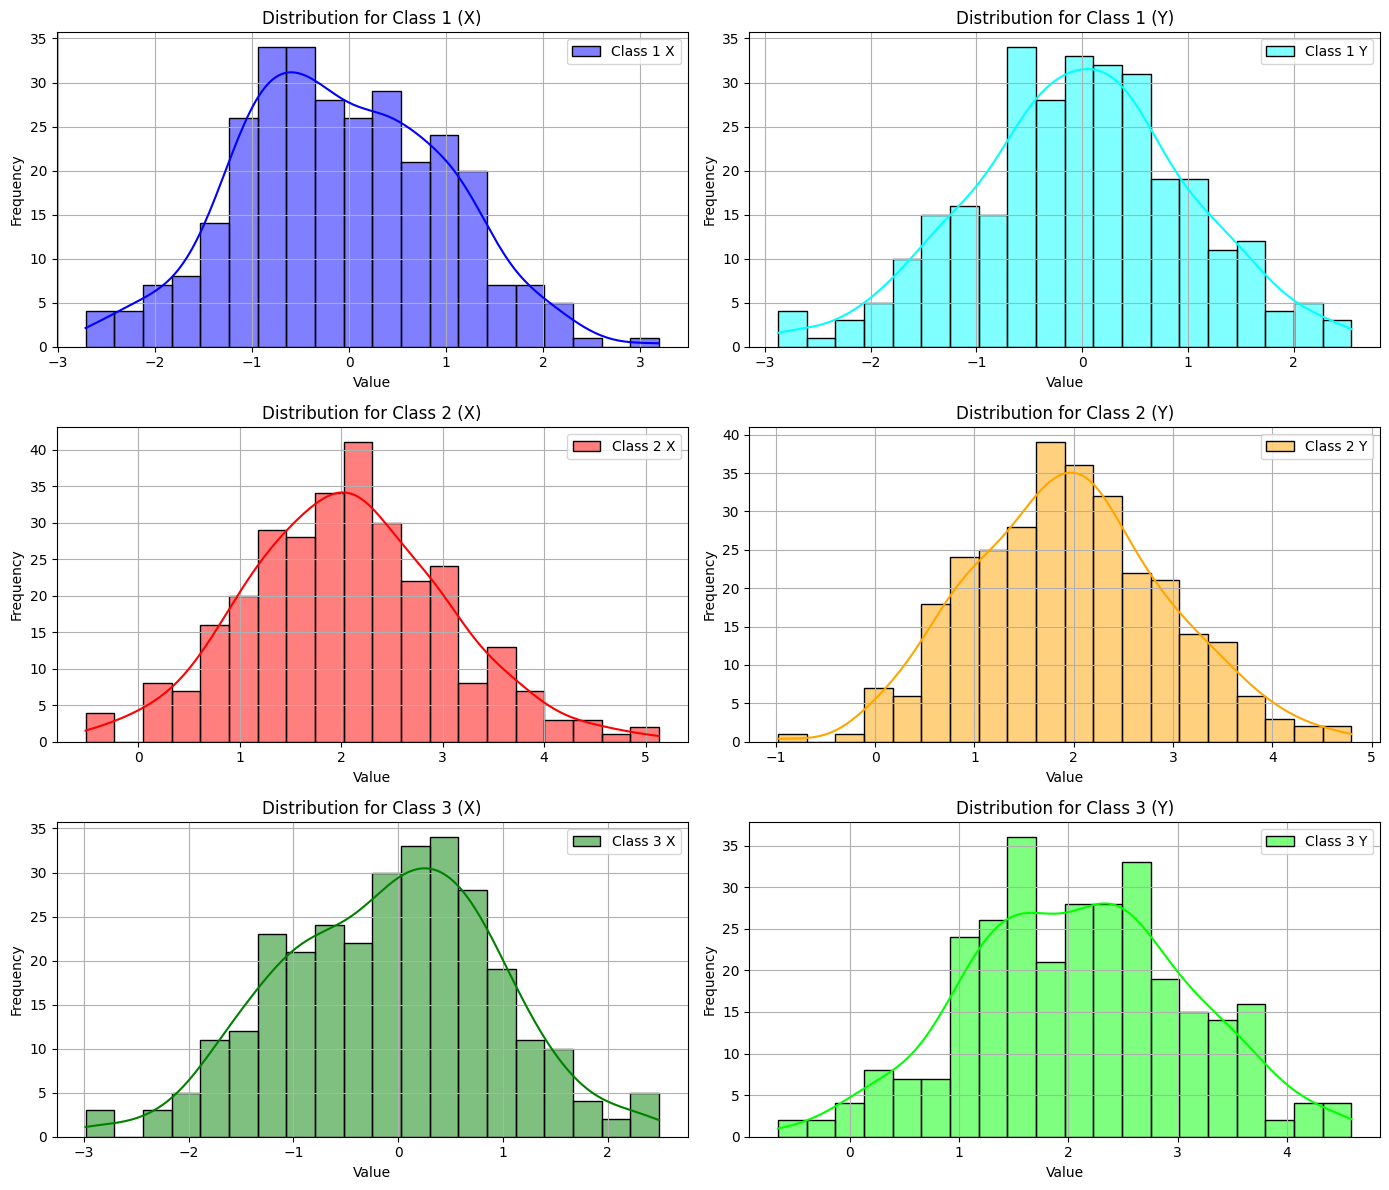

In [122]:
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
sns.histplot(data[data['class'] == 1], x='x', color='blue', bins=20, kde=True, label='Class 1 X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 1 (X)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
sns.histplot(data[data['class'] == 1], x='y', color='cyan', bins=20, kde=True, label='Class 1 Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 1 (Y)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
sns.histplot(data[data['class'] == 2], x='x', color='red', bins=20, kde=True, label='Class 2 X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 2 (X)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
sns.histplot(data[data['class'] == 2], x='y', color='orange', bins=20, kde=True, label='Class 2 Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 2 (Y)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
sns.histplot(data[data['class'] == 3], x='x', color='green', bins=20, kde=True, label='Class 3 X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 3 (X)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
sns.histplot(data[data['class'] == 3], x='y', color='lime', bins=20, kde=True, label='Class 3 Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution for Class 3 (Y)')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()


**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

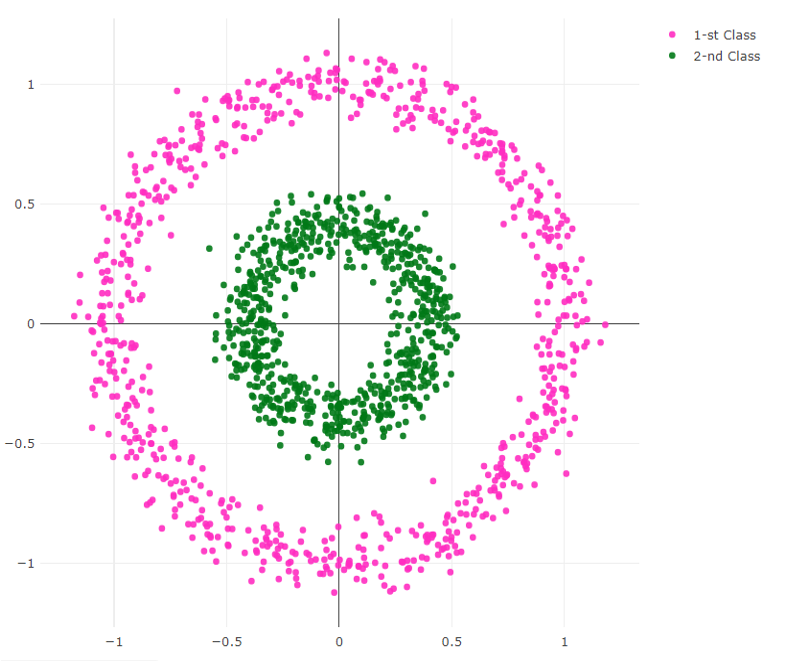

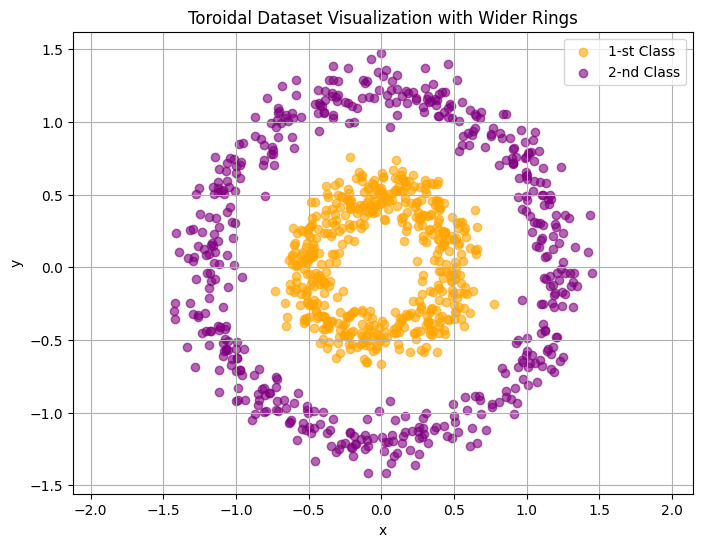

In [127]:
n_samples = 500
noise_inner = 0.1  
noise_outer = 0.1 

r_inner = 0.5
theta_inner = np.random.uniform(0, 2 * np.pi, n_samples)
x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, noise_inner, n_samples)
y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, noise_inner, n_samples)
class_inner = np.ones(n_samples)

r_outer = 1.2
theta_outer = np.random.uniform(0, 2 * np.pi, n_samples)
x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, noise_outer, n_samples)
y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, noise_outer, n_samples)
class_outer = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_inner, x_outer]),
    'y': np.concatenate([y_inner, y_outer]),
    'class': np.concatenate([class_inner, class_outer])
})

data.to_csv('toroidal_dataset.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(x_inner, y_inner, c='orange', label='1-st Class', alpha=0.6)
plt.scatter(x_outer, y_outer, c='purple', label='2-nd Class', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Toroidal Dataset Visualization with Wider Rings')
plt.grid(True)
plt.axis('equal')

plt.show()

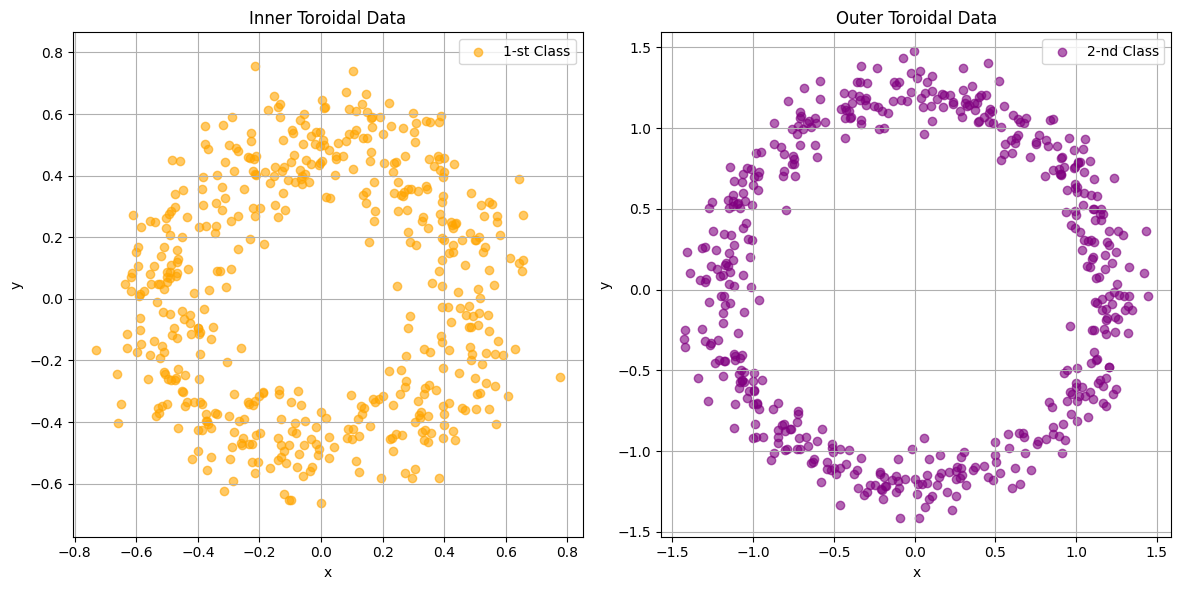

In [128]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_inner, y_inner, c='orange', label='1-st Class', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Inner Toroidal Data')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x_outer, y_outer, c='purple', label='2-nd Class', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Outer Toroidal Data')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()

plt.show()

Висновок: На основі візуалізації наборів даних можна побачити, що точки даних розподілені в круглому вигляді. Один набір даних розташований навколо кола з меншим радіусом, а інший - навколо кола з більшим радіусом. Вибір параметрів для кожного тора зроблено таким чином, щоб вони мали різні розміри та розташування, щоб зробити набори даних нелінійно роздільними. 

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

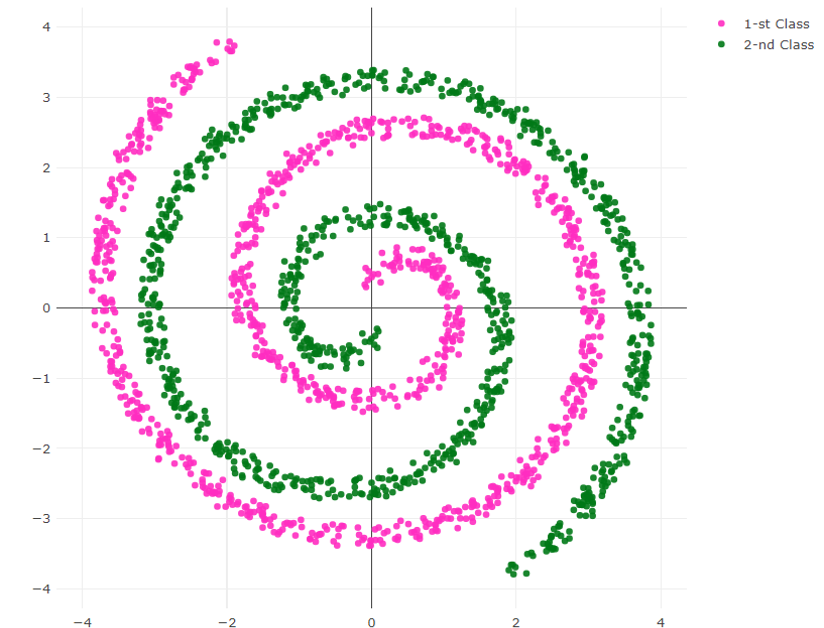

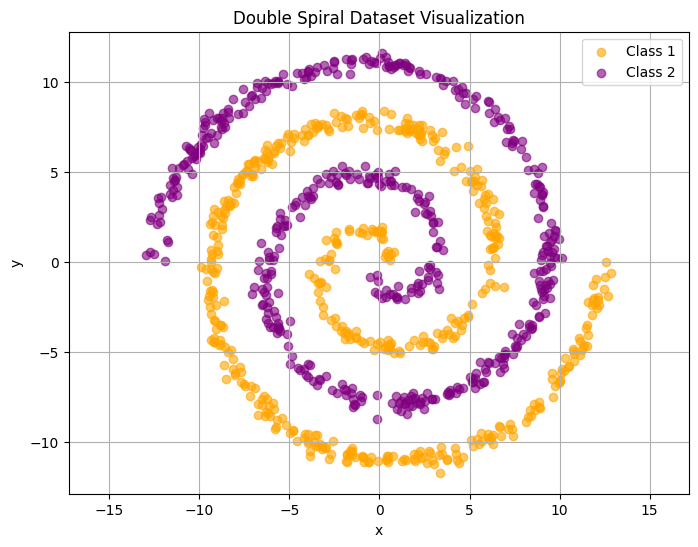

In [129]:
n_samples = 500
noise = 0.3

theta_1 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi 
r_1 = theta_1 + np.random.normal(0, noise, n_samples)
x_1 = r_1 * np.cos(theta_1)
y_1 = r_1 * np.sin(theta_1)
class_1 = np.ones(n_samples)

theta_2 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi  
r_2 = theta_2 + np.random.normal(0, noise, n_samples)
x_2 = -r_2 * np.cos(theta_2)  
y_2 = -r_2 * np.sin(theta_2)
class_2 = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_1, x_2]),
    'y': np.concatenate([y_1, y_2]),
    'class': np.concatenate([class_1, class_2])
})

data.to_csv('spiral_dataset.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(x_1, y_1, c='orange', label='Class 1', alpha=0.6)
plt.scatter(x_2, y_2, c='purple', label='Class 2', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Double Spiral Dataset Visualization')
plt.grid(True)
plt.axis('equal')  
plt.show()

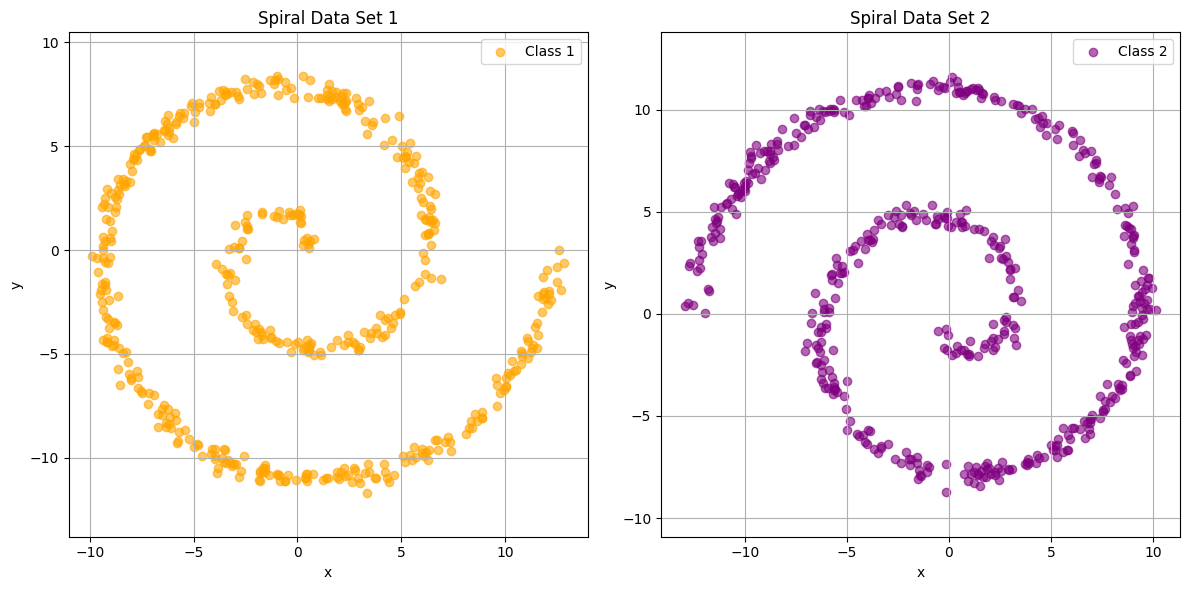

In [130]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_1, y_1, c='orange', label='Class 1', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Spiral Data Set 1')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x_2, y_2, c='purple', label='Class 2', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Spiral Data Set 2')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()

plt.show()


Висновок: Дані для кожної спіралі генеруються шляхом розподілу точок навколо кола з певним радіусом та додавання до них шуму. Для першої спіралі використовується випадкове число для визначення радіусу, а для другої спіралі використовується від'ємний радіус та інший квадрант координатної площини. Шум додається, щоб зробити класифікацію більш складною.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

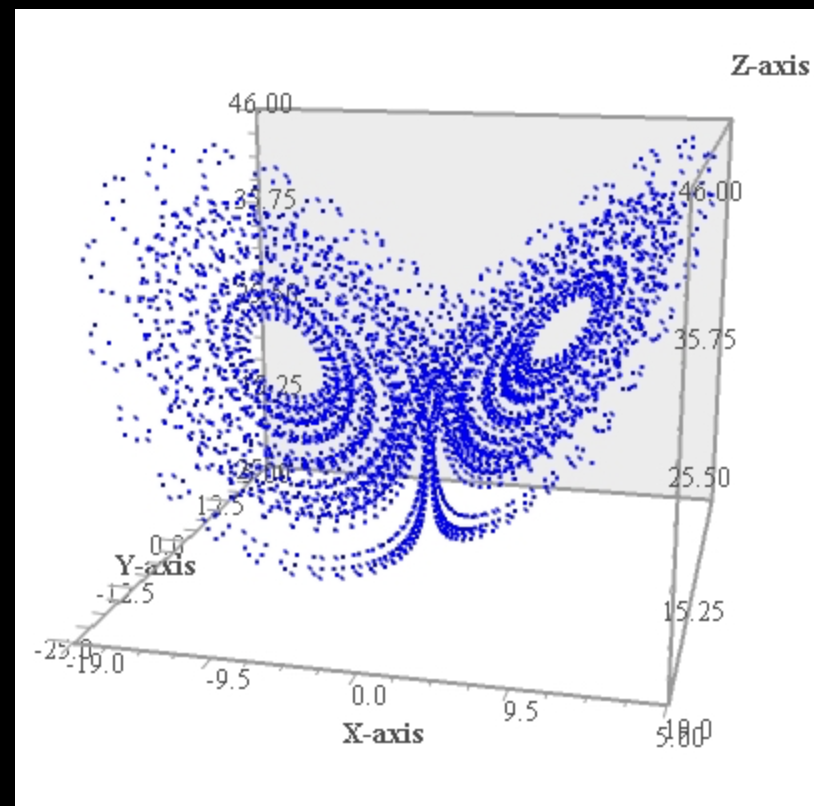

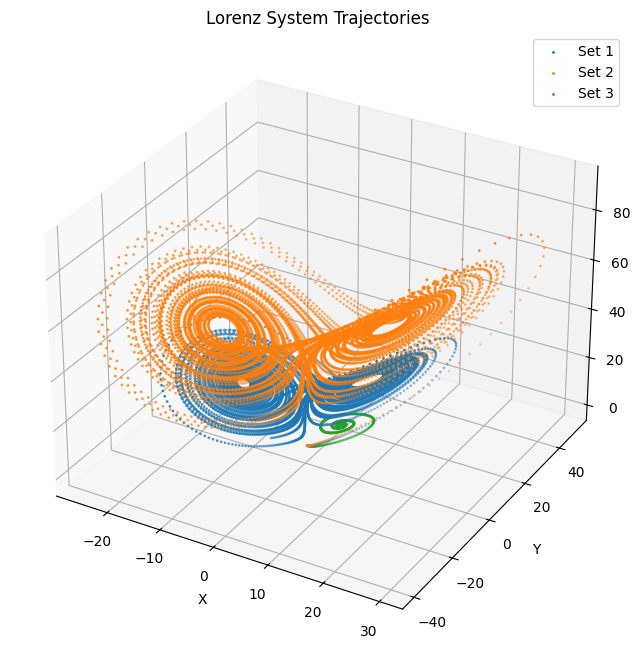

In [131]:
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

params = [(10, 28, 8/3), (10, 50, 8/3), (28, 10, 8/3)]

t = np.linspace(0, 50, 10000)
initial_state = [0, 1, 0]
trajectories = [odeint(lorenz, initial_state, t, args=p) for p in params]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, traj in enumerate(trajectories):
    ax.scatter(traj[:, 0], traj[:, 1], traj[:, 2], label=f'Set {i+1}', s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System Trajectories')
ax.legend()

plt.show()

Висновок: Зміна параметрів sigma, rho, та beta впливає на форму та швидкість зміни траєкторій системи Лоренца. Система може переходити від стабільного до хаотичного режиму.